In [1]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.linear_model import Ridge
from sklearn.datasets import make_regression

# Generate data
X, y = make_regression(n_samples=100, n_features=5, noise=10, random_state=42)

# Define Ridge Regression
ridge = Ridge()

# Hyperparameter Grid
param_grid = {'alpha': [0.1, 1, 10, 100]}

# Different folds for Grid Search
for k in [3, 5, 10]:
    print(f"\nGrid Search with {k}-Fold Cross-Validation")
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    grid_search = GridSearchCV(ridge, param_grid, cv=kf, scoring='neg_mean_squared_error')
    grid_search.fit(X, y)
    
    print("Best Alpha:", grid_search.best_params_['alpha'])
    print("Best Score:", grid_search.best_score_)



Grid Search with 3-Fold Cross-Validation
Best Alpha: 0.1
Best Score: -91.7090880729571

Grid Search with 5-Fold Cross-Validation
Best Alpha: 0.1
Best Score: -94.1809726649212

Grid Search with 10-Fold Cross-Validation
Best Alpha: 0.1
Best Score: -95.6657882972542


Common Scoring Metrics
|Metric	| Usage | Scoring Keyword in GridSearchCV
| --- | --- | --- |
| Mean Squared Error (MSE) |	Penalizes large errors | `neg_mean_squared_error`
| Root Mean Squared Error (RMSE) | Similar to MSE, but in original units | (Calculate manually from `neg_mean_squared_error`)
| Mean Absolute Error (MAE)	| Measures absolute differences	| `neg_mean_absolute_error`
| R² Score (R-Squared)	| Measures model fit (1 is perfect)	| `r2`
| Explained Variance	| Measures how well variance is explained | `explained_variance`


In [2]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.linear_model import Ridge
from sklearn.datasets import make_regression
import numpy as np

# Generate synthetic regression data
X, y = make_regression(n_samples=100, n_features=5, noise=10, random_state=42)

# Define Ridge Regression
ridge = Ridge()

# Hyperparameter Grid
param_grid = {'alpha': [0.1, 1, 10, 100]}

# Different scoring metrics
scoring_metrics = ['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2', 'explained_variance']

# Loop through scoring options
for metric in scoring_metrics:
    print(f"\nGrid Search using scoring metric: {metric}")
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    grid_search = GridSearchCV(ridge, param_grid, cv=kf, scoring=metric)
    grid_search.fit(X, y)
    
    print("Best Alpha:", grid_search.best_params_['alpha'])
    print(f"Best {metric.replace('_', ' ').title()}: {grid_search.best_score_:.4f}")

# Additional calculation for RMSE
best_mse = grid_search.cv_results_['mean_test_score'][np.argmax(grid_search.cv_results_['mean_test_score'])]
best_rmse = np.sqrt(-best_mse)
print(f"\nBest RMSE from Grid Search: {best_rmse:.4f}")



Grid Search using scoring metric: neg_mean_squared_error
Best Alpha: 0.1
Best Neg Mean Squared Error: -94.1810

Grid Search using scoring metric: neg_mean_absolute_error
Best Alpha: 0.1
Best Neg Mean Absolute Error: -7.5959

Grid Search using scoring metric: r2
Best Alpha: 0.1
Best R2: 0.9949

Grid Search using scoring metric: explained_variance
Best Alpha: 0.1
Best Explained Variance: 0.9952

Best RMSE from Grid Search: nan


C:\Users\Justin\AppData\Local\Temp\ipykernel_18724\23969043.py:30: RuntimeWarning: invalid value encountered in sqrt
  best_rmse = np.sqrt(-best_mse)


### How Different Scoring Metrics Impact Model Selection
##### MSE vs. MAE:
- MSE penalizes large errors more than MAE.
- If you want to reduce extreme errors, use MSE.
- If you want a robust error measure, use MAE.

##### R² Score:
- Ranges from 1 (perfect fit) to -∞ (bad fit).
- Use if you want to maximize model fit.

##### Explained Variance:
- Similar to R² but does not penalize biased models.
- If you care more about variance captured, use this.

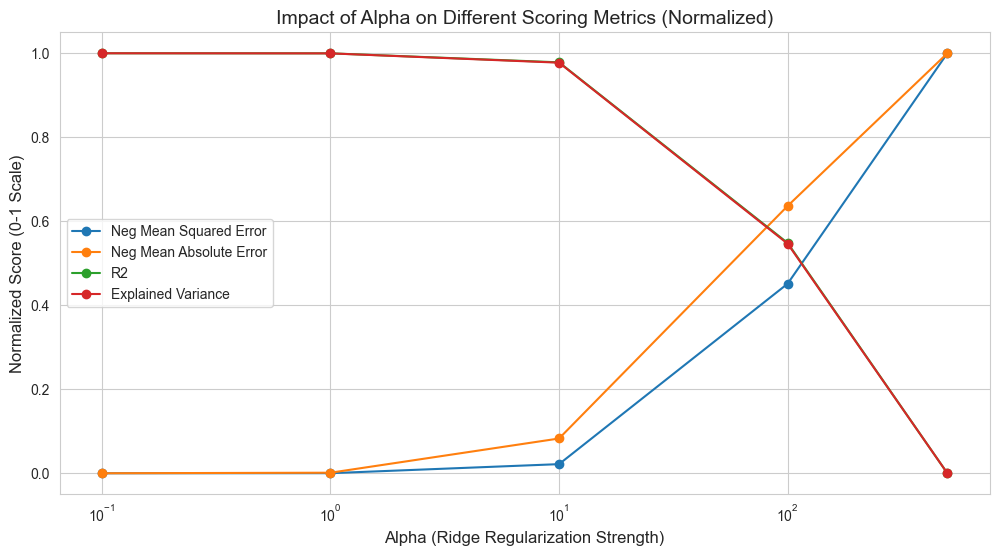

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.linear_model import Ridge
from sklearn.datasets import make_regression
from sklearn.preprocessing import MinMaxScaler

# Generate synthetic regression data
X, y = make_regression(n_samples=100, n_features=5, noise=15, random_state=42)

# Define Ridge Regression
ridge = Ridge()

# Hyperparameter Grid
param_grid = {'alpha': [0.1, 1, 10, 100, 500]}

# Different scoring metrics
scoring_metrics = ['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2', 'explained_variance']

# Initialize dictionary to store results
results = {}

# Perform Grid Search for each scoring metric
kf = KFold(n_splits=5, shuffle=True, random_state=42)
for metric in scoring_metrics:
    grid_search = GridSearchCV(ridge, param_grid, cv=kf, scoring=metric)
    grid_search.fit(X, y)
    
    # Convert scores (neg values for errors to positive for plotting)
    mean_scores = grid_search.cv_results_['mean_test_score']
    if "neg_" in metric:
        mean_scores = -mean_scores  # Convert negative errors to positive values

    results[metric] = mean_scores

# Convert alpha values to numpy array for plotting
alphas = np.array(param_grid['alpha'])

# Normalize scores using MinMaxScaler
scaler = MinMaxScaler()
normalized_results = {metric: scaler.fit_transform(np.array(scores).reshape(-1, 1)).flatten() for metric, scores in results.items()}

# Set Seaborn style
sns.set_style("whitegrid")

# Plot results
plt.figure(figsize=(12, 6))
for metric, scores in normalized_results.items():
    plt.plot(alphas, scores, marker='o', linestyle='-', label=metric.replace('_', ' ').title())

# Formatting the plot
plt.xscale('log')  # Log scale for better visualization
plt.xlabel("Alpha (Ridge Regularization Strength)", fontsize=12)
plt.ylabel("Normalized Score (0-1 Scale)", fontsize=12)
plt.title("Impact of Alpha on Different Scoring Metrics (Normalized)", fontsize=14)
plt.legend()
plt.show()
